In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
print(train_data.shape, test_data.shape)

(25000,) (25000,)


In [3]:
# Data comes encoded: each word has unique integer Id. Let us reverse this mapping and have look at the data.
word_index = imdb.get_word_index()

In [7]:
# Reversing the word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [8]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
import numpy as np

In [12]:
# We shall vectorize text data input. 

# We confine data to the most frequent 10000 words and turn reviews
# into multi-hot encoding

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [10]:
#for i, sequence in enumerate(train_data):
#    print(i, sequence)

In [14]:
# Vectorizing data samples (texts) and casting binary labels as floats for the sigmoid comparison

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
x_train.shape

(25000, 10000)

In [16]:
from keras import models, layers, optimizers, losses, metrics

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# Introducind second Dense layer - DEEP LEARNING!!!
model.add(layers.Dense(16, activation='relu'))

# Single sigmoid output: binary classification probability
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model upon setup
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc']) 

# We can make explicit calls ans specify hyperparameters

#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#             loss=losses.binary_crossentropy,
#             metrics=[metrics.binary_accuracy])


In [20]:
# Preparing validation split:

# Training optimizes parameters
# Validation optimizes hyperparameters
# Test checks the model architecture itself

x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]


In [21]:
# Fit the model with explicit validation data specification
# The call returns History class instance with learning effects details

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s - loss: 0.5084 - acc: 0.7825 - val_loss: 0.3825 - val_acc: 0.8593
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.2976 - acc: 0.9048 - val_loss: 0.3097 - val_acc: 0.8811
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2181 - acc: 0.9296 - val_loss: 0.3092 - val_acc: 0.8756
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.1770 - acc: 0.9413 - val_loss: 0.2747 - val_acc: 0.8914
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.1398 - acc: 0.9553 - val_loss: 0.2782 - val_acc: 0.8909
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1162 - acc: 0.9632 - val_loss: 0.2948 - val_acc: 0.8883
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.0955 - acc: 0.9710 - val_loss: 0.3225 - val_acc: 0.8830
Epoch 8/20
15000/15000 [==============================] - 2s 

In [22]:
# History is a dictionary
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

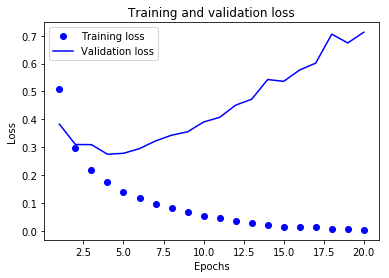

In [23]:
# Let us plot the training and validation loss
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
history_dict.keys()

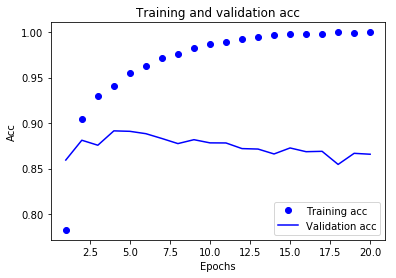

In [24]:
# Now let us observe accuracy on train and validation datasets
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [25]:
# Final evaluation on the test data - no futher adjustments allowed
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s     


[0.77357011712789536, 0.85231999999999997]

In [26]:
# Ultimate 'production' application of the trained model: inference (the prediction)
model.predict(x_test)

array([[  9.98819172e-01],
       [  9.93136644e-01],
       [  9.99993324e-01],
       ..., 
       [  8.77415001e-01],
       [  5.58610047e-08],
       [  7.54545212e-01]], dtype=float32)